In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load the data

In [3]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [4]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [5]:
def compute_loss(y, tx, w, loss_type="MSE"):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    if loss_type not in ["MSE", "MAE"]:
        raise ValueError("Invalid loss_type. Supported types are 'MSE' and 'MAE'.")
    if loss_type == "MAE":
        errors = np.abs(y - tx @ w)  # MAE
    else:  # MSE
        errors = (y - tx @ w) ** 2  # MSE
    loss = np.sum(errors) / (2 * len(y))
    # ***************************************************
    return loss

In [6]:
print(f"Test loss: {compute_loss(y, tx, np.array([1, 1]))}")

Test loss: 2706.4630783220728


# 2. Grid Search

Fill in the function `grid_search()` below:

In [7]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    for i, w0 in enumerate(grid_w0):
        for j, w1 in enumerate(grid_w1):
            w = np.array([w0, w1])
            losses[i, j] = compute_loss(y, tx, w, loss_type="MSE")
    # ***************************************************
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=18.793541019523104, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.080 seconds


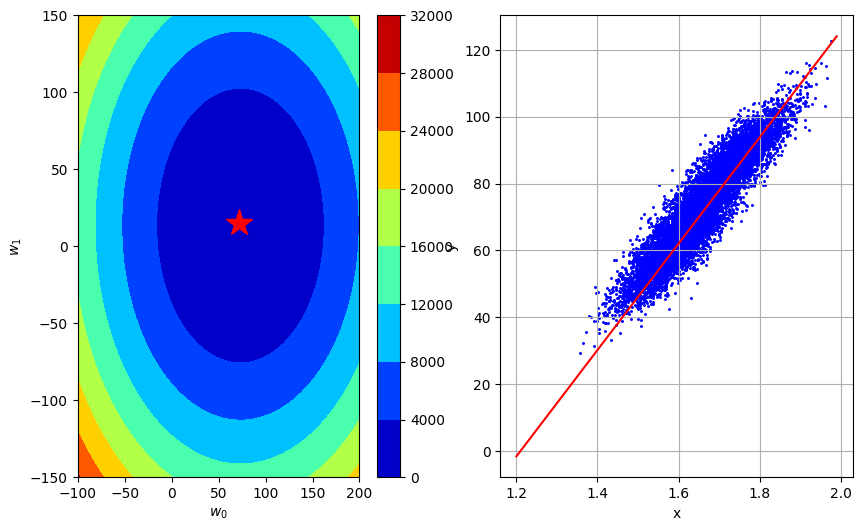

In [8]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [9]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    return -1 / len(y) * tx.T @ (y - tx @ w)
    # ***************************************************
    raise NotImplementedError

Please fill in the functions `gradient_descent` below:

In [10]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters + 1 containing the model parameters as numpy arrays of shape (2, ),
            for each iteration of GD (as well as the final weights)
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        loss = compute_loss(y, tx, w, loss_type="MSE")
        gradient = compute_gradient(y, tx, w)
        # ***************************************************
        # ***************************************************
        # INSERT YOUR CODE HERE
        w = w - gamma * gradient
        # ***************************************************

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [11]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2792.236712759167, w0=51.3057454014737, w1=9.435798704492473
GD iter. 1/49: loss=265.3024621089567, w0=66.6974690219157, w1=12.266538315840135
GD iter. 2/49: loss=37.87837955044083, w0=71.3149861080483, w1=13.115760199244388
GD iter. 3/49: loss=17.410212120174414, w0=72.70024123388808, w1=13.370526764265657
GD iter. 4/49: loss=15.568077051450452, w0=73.11581777164001, w1=13.446956733772032
GD iter. 5/49: loss=15.402284895265295, w0=73.2404907329656, w1=13.469885724623945
GD iter. 6/49: loss=15.38736360120863, w0=73.27789262136326, w1=13.476764421879517
GD iter. 7/49: loss=15.38602068474353, w0=73.28911318788256, w1=13.478828031056189
GD iter. 8/49: loss=15.385899822261674, w0=73.29247935783836, w1=13.47944711380919
GD iter. 9/49: loss=15.385888944638305, w0=73.2934892088251, w1=13.47963283863509
GD iter. 10/49: loss=15.3858879656522, w0=73.29379216412111, w1=13.479688556082861
GD iter. 11/49: loss=15.385887877543452, w0=73.29388305070992, w1=13.479705271317192
GD it

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

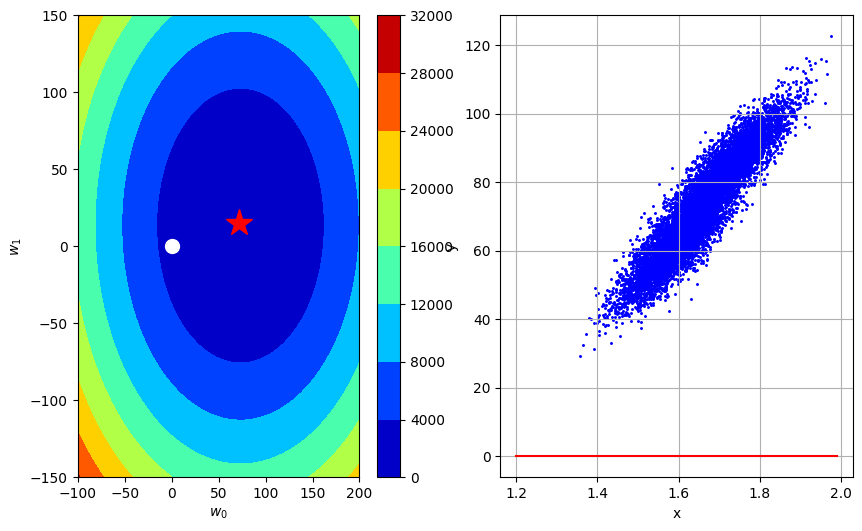

In [15]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

# 4. Stochastic gradient descent

In [19]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    return -1 / len(y) * tx.T @ (y - tx @ w)
    # ***************************************************
    raise NotImplementedError


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        for batch_y, batch_x, in batch_iter(y, tx, batch_size):
            loss = compute_loss(batch_y, batch_x, w, loss_type="MSE")
            gradient = compute_stoch_gradient(batch_y, batch_x, w)
            w = w - gamma * gradient
        ws.append(w)
        losses.append(loss)
        # ***************************************************

        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [20]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=3928.4855761260083, w0=8.863955749129175, w1=7.7897944758087725
SGD iter. 1/49: loss=1742.1519944069707, w0=14.766755075562305, w1=6.96714023536391
SGD iter. 2/49: loss=2022.341457827863, w0=21.126537238227726, w1=7.526053926432807
SGD iter. 3/49: loss=1848.0061772257923, w0=27.20602106043795, w1=16.871822166237123
SGD iter. 4/49: loss=1582.8553517139312, w0=32.832485939407576, w1=8.907758350595799
SGD iter. 5/49: loss=484.7557888398798, w0=35.94618402637709, w1=7.314762864525251
SGD iter. 6/49: loss=556.9506671509605, w0=39.283700070236534, w1=5.307339894260702
SGD iter. 7/49: loss=190.3471141809045, w0=41.23483878483837, w1=1.1961596272880062
SGD iter. 8/49: loss=974.8131692531517, w0=45.65029610940431, w1=2.3520949091425054
SGD iter. 9/49: loss=1194.0392342064913, w0=50.53709308535183, w1=8.281325971243579
SGD iter. 10/49: loss=532.5517039316352, w0=53.800685290060116, w1=9.481716133172041
SGD iter. 11/49: loss=84.26172610021754, w0=55.098851119992624, w1=9.3413

interactive(children=(IntSlider(value=50, description='n_iter', max=150, min=-50), Output()), _dom_classes=('w…

<function __main__.plot_figure(n_iter)>

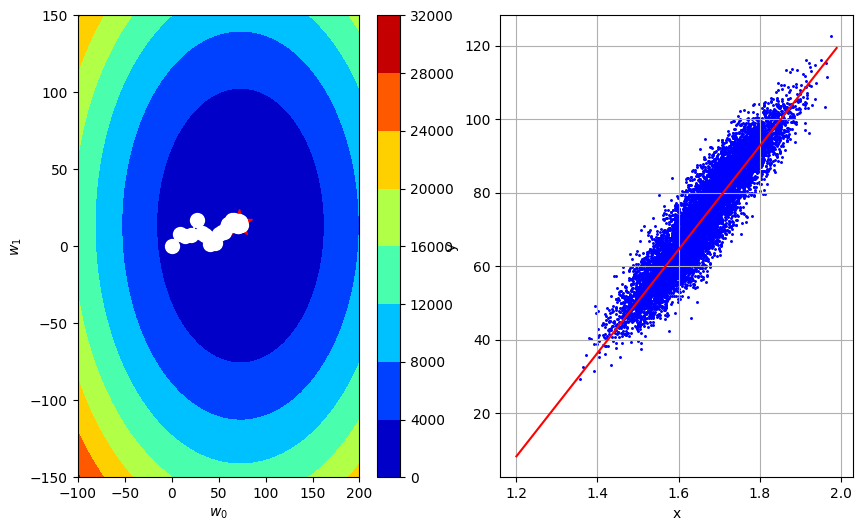

In [26]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=50)

# 5. Effect of Outliers and MAE Cost Function

In [39]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
# ***************************************************

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [40]:
y.shape, tx.shape

((202,), (202, 2))

In [41]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
# ***************************************************


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2869.8351145358524, w0=51.84746409844847, w1=7.724426406192433
GD iter. 1/49: loss=318.2821247015953, w0=67.401703327983, w1=10.041754328050116
GD iter. 2/49: loss=88.6423556165126, w0=72.06797509684336, w1=10.736952704607411
GD iter. 3/49: loss=67.9747763988552, w0=73.46785662750146, w1=10.945512217574596
GD iter. 4/49: loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631796
GD iter. 6/49: loss=65.93222021235334, w0=74.0516072257859, w1=11.03248153448191
GD iter. 7/49: loss=65.93086421248088, w0=74.06294626618423, w1=11.034170866536943
GD iter. 8/49: loss=65.93074217249236, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=65.93073118889338, w0=74.06736849193958, w1=11.034829706038407
GD iter. 10/49: loss=65.93073020036948, w0=74.06767464603033, w1=11.034875318003891
GD iter. 11/49: loss=65.93073011140234, w0=74.06776649225755, w1=11.034889001593537
GD iter. 

interactive(children=(IntSlider(value=50, description='n_iter', max=150, min=-50), Output()), _dom_classes=('w…

<function __main__.plot_figure(n_iter)>

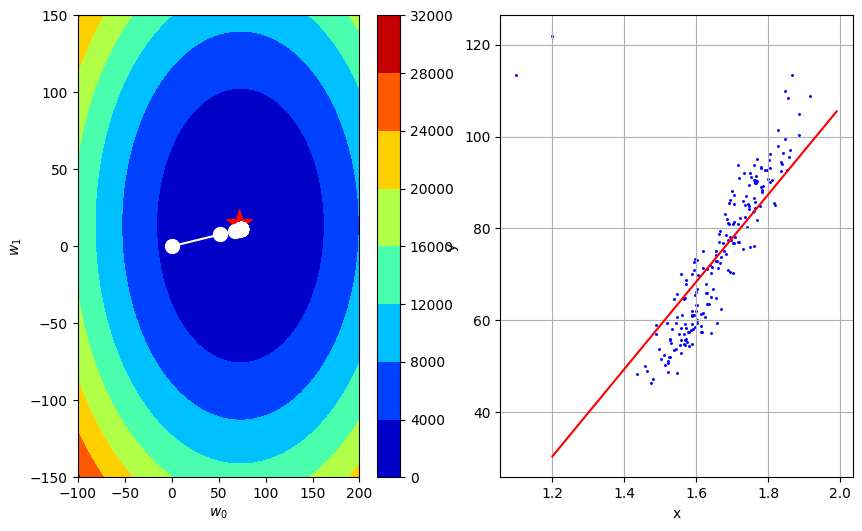

In [42]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=50)

# 6. Subgradient descent

In [44]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    e = y - tx @ w
    subgradient = -1 / len(y) * tx.T @ np.sign(e)
    return subgradient
    # ***************************************************
    raise NotImplementedError

In [45]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        subgradients = compute_subgradient_mae(y, tx, w)
        loss = compute_loss(y, tx, w, loss_type="MAE")
        # ***************************************************
        # ***************************************************
        # INSERT YOUR CODE HERE
        w = w - gamma * subgradients
        # *************************************************

        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [46]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=37.03390292746319, w0=0.7000000000000004, w1=8.427286646295328e-16
SubGD iter. 1/499: loss=36.68390292746319, w0=1.4000000000000008, w1=1.6854573292590656e-15
SubGD iter. 2/499: loss=36.333902927463186, w0=2.1000000000000014, w1=2.5281859938885984e-15
SubGD iter. 3/499: loss=35.983902927463184, w0=2.8000000000000016, w1=3.3709146585181312e-15
SubGD iter. 4/499: loss=35.63390292746319, w0=3.5000000000000018, w1=4.2136433231476644e-15
SubGD iter. 5/499: loss=35.28390292746319, w0=4.200000000000002, w1=5.056371987777198e-15
SubGD iter. 6/499: loss=34.93390292746319, w0=4.900000000000002, w1=5.899100652406731e-15
SubGD iter. 7/499: loss=34.58390292746319, w0=5.600000000000002, w1=6.741829317036264e-15
SubGD iter. 8/499: loss=34.233902927463184, w0=6.3000000000000025, w1=7.584557981665797e-15
SubGD iter. 9/499: loss=33.88390292746319, w0=7.000000000000003, w1=8.42728664629533e-15
SubGD iter. 10/499: loss=33.53390292746319, w0=7.700000000000003, w1=9.270015310924864e-

interactive(children=(IntSlider(value=300, description='n_iter', max=900, min=-300), Output()), _dom_classes=(…

<function __main__.plot_figure(n_iter)>

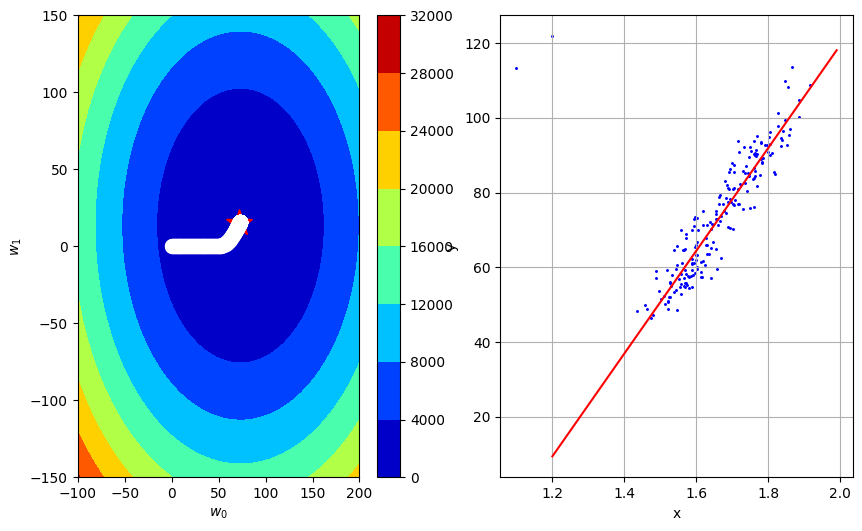

In [52]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=300)

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [53]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    loss = 0

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        for batch_y, batch_x, in batch_iter(y, tx, batch_size):
            loss = compute_loss(batch_y, batch_x, w, loss_type="MAE")
            subgradient = compute_subgradient_mae(batch_y, batch_x, w)
            w = w - gamma * subgradient
        ws.append(w)
        losses.append(loss)
        # ***************************************************

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [54]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=29.657031334834155, w0=0.7, w1=-0.8538462704252691
SubSGD iter. 1/499: loss=28.279925714475812, w0=1.4, w1=-1.2940415251322404
SubSGD iter. 2/499: loss=41.94867321835148, w0=2.0999999999999996, w1=-0.7659857096215916
SubSGD iter. 3/499: loss=29.786492777474564, w0=2.8, w1=-1.1227112279774283
SubSGD iter. 4/499: loss=27.117011050731005, w0=3.5, w1=-1.4078857225267227
SubSGD iter. 5/499: loss=26.469377442016604, w0=4.2, w1=-1.897569255923311
SubSGD iter. 6/499: loss=27.912748668200727, w0=4.9, w1=-2.114826260103061
SubSGD iter. 7/499: loss=38.49469560950667, w0=5.6000000000000005, w1=-1.7711136389196707
SubSGD iter. 8/499: loss=27.282312359001573, w0=6.300000000000001, w1=-2.1665504308626766
SubSGD iter. 9/499: loss=23.605666567323198, w0=7.000000000000001, w1=-2.598343009146097
SubSGD iter. 10/499: loss=21.887262362094553, w0=7.700000000000001, w1=-3.332457332147086
SubSGD iter. 11/499: loss=38.58653703632362, w0=8.4, w1=-2.675274628952101
SubSGD iter. 12/499: l

interactive(children=(IntSlider(value=150, description='n_iter', max=450, min=-150), Output()), _dom_classes=(…

<function __main__.plot_figure(n_iter)>

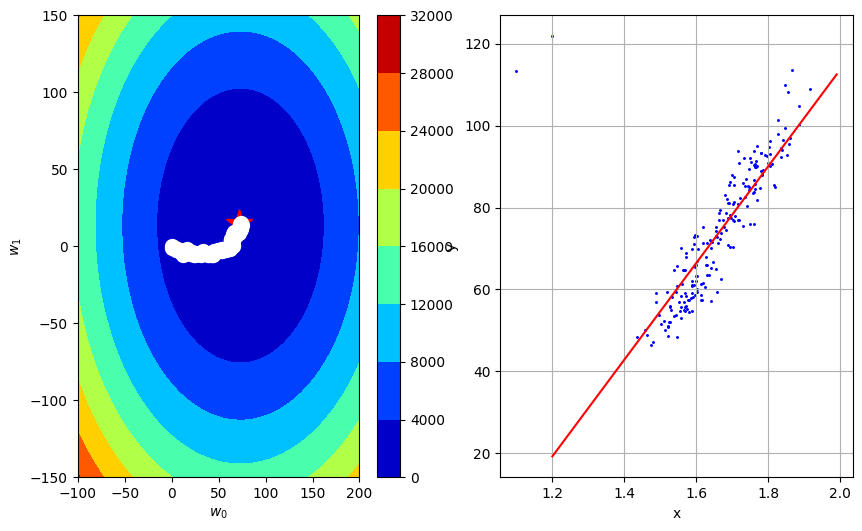

In [58]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=150)